# Importation des lib

In [30]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Lecture du fichier

In [2]:
data=pd.read_csv('Shill Bidding Dataset.csv')

# Type de nos donnée

In [10]:
#affichier les type de donnée
data.dtypes

Record_ID                   int64
Auction_ID                  int64
Bidder_ID                  object
Bidder_Tendency           float64
Bidding_Ratio             float64
Successive_Outbidding     float64
Last_Bidding              float64
Auction_Bids              float64
Starting_Price_Average    float64
Early_Bidding             float64
Winning_Ratio             float64
Auction_Duration            int64
Class                       int64
dtype: object

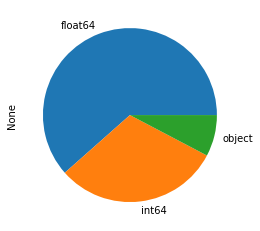

In [9]:
#compter pour chaque type de donnée combien il y'a
data.dtypes.value_counts().plot.pie()

# Le resumé des données

In [11]:
data.describe()

,Record_ID,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,7535.829457,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,4364.759137,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,1.000000,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3778.000000,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,7591.000000,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,11277.000000,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,15144.000000,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [18]:
#Moyenne des valeur par rapport à la classe target
dmoyenn=dataa.copy() 
dmoyenn = dmoyenn.drop('Auction_Duration', axis=1)
dmoyenn.groupby("Class").mean()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
Class,,,,,,,,
0,0.122403,0.101775,0.016649,0.450286,0.227638,0.465605,0.423630,0.308242
1,0.310979,0.344268,0.832593,0.570463,0.264797,0.533181,0.489674,0.865322


# Annalyse des valeurs manquantes

In [13]:
data.isna().sum()/data.shape[0]

Record_ID                 0.0
Auction_ID                0.0
Bidder_ID                 0.0
Bidder_Tendency           0.0
Bidding_Ratio             0.0
Successive_Outbidding     0.0
Last_Bidding              0.0
Auction_Bids              0.0
Starting_Price_Average    0.0
Early_Bidding             0.0
Winning_Ratio             0.0
Auction_Duration          0.0
Class                     0.0
dtype: float64

On remarque qu'on as pas de variable manquante

# Pourcentage de la class 0 et 1 pour la target


In [15]:
data['Class'].unique()#elle pricise les types de donnees de cette variables

array([0, 1], dtype=int64)

Text(0, 0.5, '')

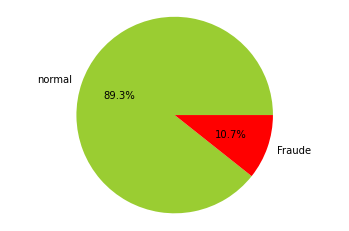

In [5]:
fig, ax = plt.subplots(1, 1)
ax.pie(data.Class.value_counts(),autopct='%1.1f%%', labels=['normal','Fraude'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')
# donc il y a 10,7% de class fraudé et 89.3% de class normal

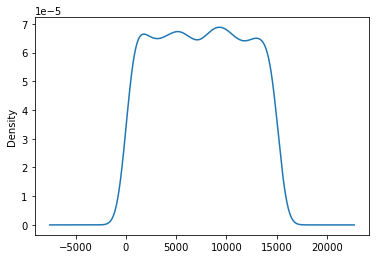

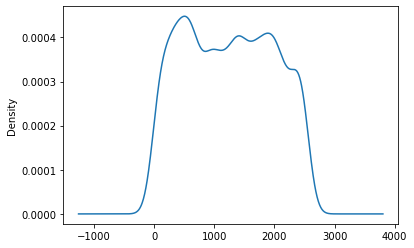

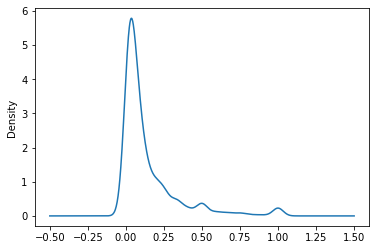

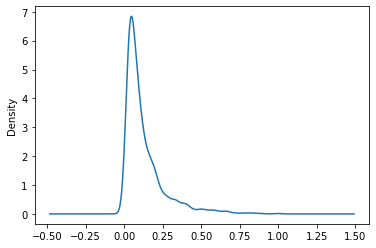

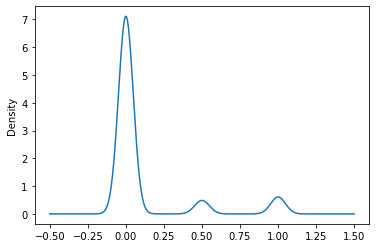

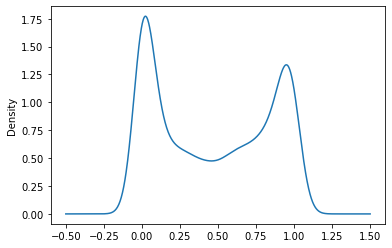

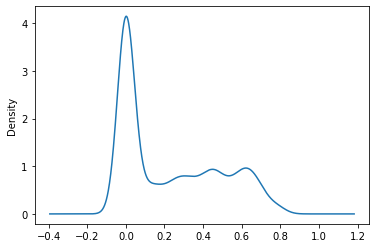

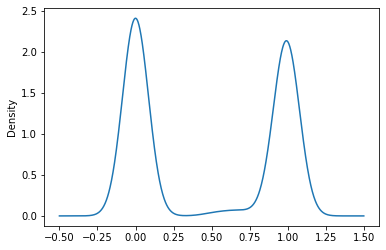

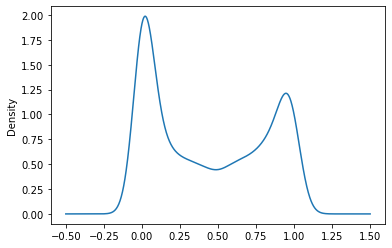

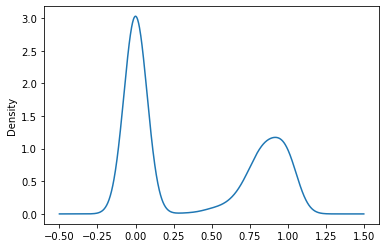

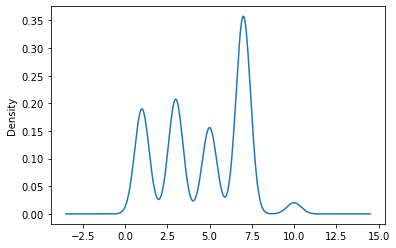

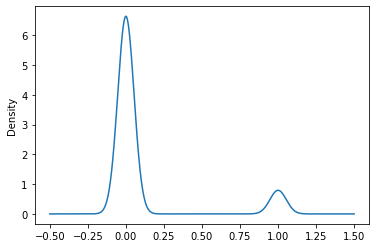

In [28]:
#densité des variables
for col in data:
    plt.figure()
    data[col].plot(kind = "kde")

C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


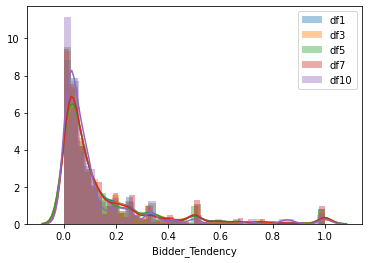

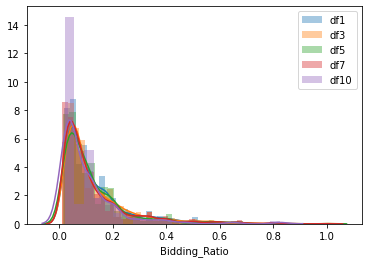

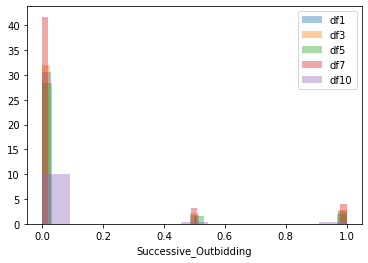

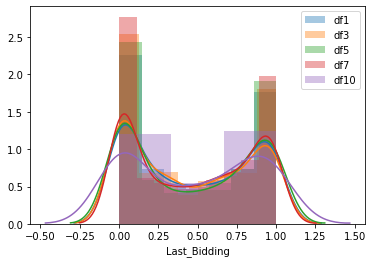

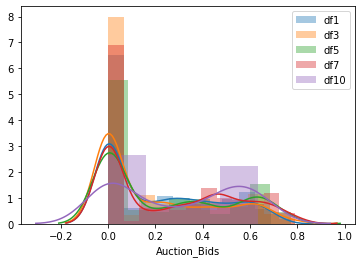

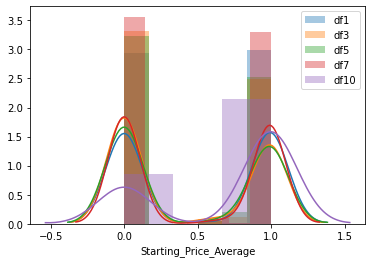

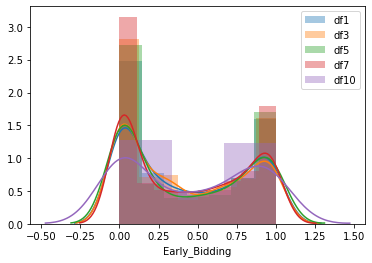

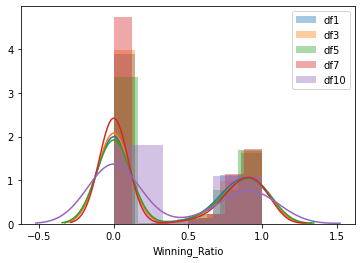

In [29]:
#densiter des jour par rapport aux les autres valeurs 
df1 = data[data['Auction_Duration'] == 1] 
df3 = data[data['Auction_Duration'] == 3]
df5= data[data['Auction_Duration'] == 5]
df7 =data[data['Auction_Duration'] == 7]
df10 = data[data['Auction_Duration'] == 10]
for col in colm:
    plt.figure()
    sns.distplot(df1[col], label='df1')
    sns.distplot(df3[col], label='df3')
    sns.distplot(df5[col], label='df5')
    sns.distplot(df7[col], label='df7')
    sns.distplot(df10[col], label='df10')
    plt.legend()

# Afficher la repartition des donnée pour chaque variable de type float par                                            rapport à chaque classe 0 et 1 

C:\anaconda\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


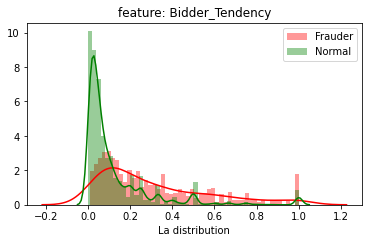

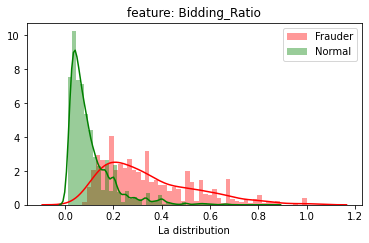

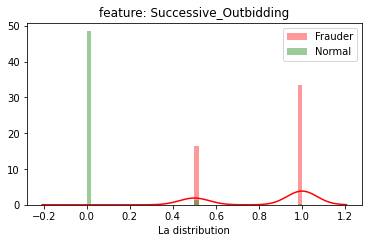

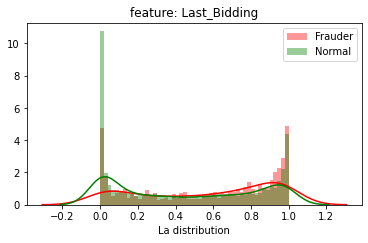

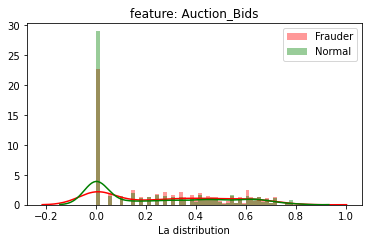

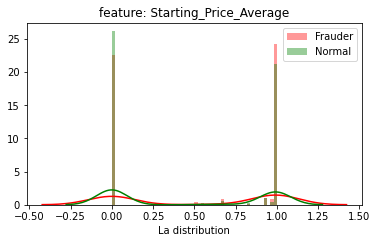

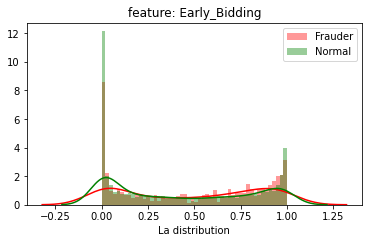

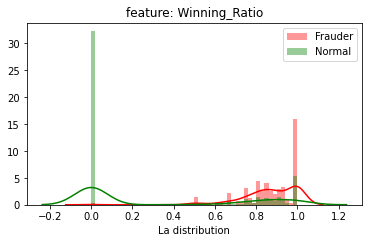

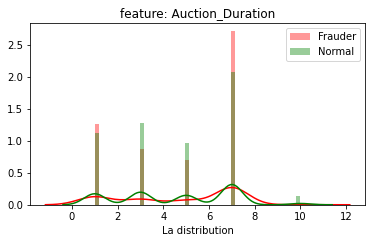

In [8]:
dataa=data.drop(['Record_ID','Auction_ID','Bidder_ID'],axis=1)
gs = gridspec.GridSpec(28, 1)
for i, col in enumerate(dataa[dataa.iloc[:,0:9].columns]):
    plt.figure(figsize=(6,28*4))
    ax5 = plt.subplot(gs[i])
    sns.distplot(dataa[col][dataa.Class == 1], label='Frauder', bins=50, color='r')
    sns.distplot(dataa[col][dataa.Class == 0], label='Normal', bins=50, color='g')
    ax5.set_xlabel('La distribution')
    ax5.set_title('feature: ' + str(col))
    plt.legend()

# Correlation

In [12]:
dataa.corr()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Bidder_Tendency,1.000000,0.293076,0.313510,0.044999,0.086564,0.073242,0.019978,0.212170,0.000244,0.295533
Bidding_Ratio,0.293076,1.000000,0.604828,-0.066541,-0.347831,-0.252289,-0.147773,0.642905,-0.019205,0.569435
Successive_Outbidding,0.313510,0.604828,1.000000,0.098941,0.065361,0.052263,0.056798,0.382002,0.010091,0.901035
Last_Bidding,0.044999,-0.066541,0.098941,1.000000,0.297639,0.293323,0.950096,-0.076726,0.011454,0.097655
Auction_Bids,0.086564,-0.347831,0.065361,0.297639,1.000000,0.629086,0.298878,-0.381442,0.093331,0.044964
Starting_Price_Average,0.073242,-0.252289,0.052263,0.293323,0.629086,1.000000,0.302958,-0.262655,0.022990,0.042604
Early_Bidding,0.019978,-0.147773,0.056798,0.950096,0.298878,0.302958,1.000000,-0.137005,0.011296,0.053570
Winning_Ratio,0.212170,0.642905,0.382002,-0.076726,-0.381442,-0.262655,-0.137005,1.000000,-0.023965,0.394122
Auction_Duration,0.000244,-0.019205,0.010091,0.011454,0.093331,0.022990,0.011296,-0.023965,1.000000,0.021145
Class,0.295533,0.569435,0.901035,0.097655,0.044964,0.042604,0.053570,0.394122,0.021145,1.000000


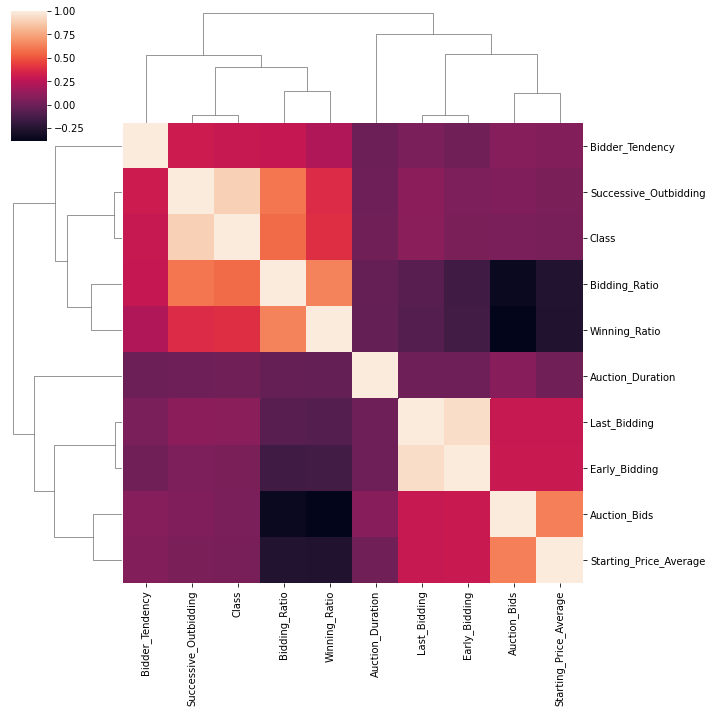

In [16]:
sns.clustermap(dataa.corr())

# La correlation pour chaque class seul

In [21]:
# Devision de dataset par rapport a la classe 
da=data.copy()
da=da.drop(columns=['Record_ID','Auction_ID','Auction_Duration','Bidder_ID'],axis=1)
data_Nigatif=da[da['Class']==1]
data_Positif=da[da['Class']==0]
data_Nigatif=data_Nigatif.drop(columns=['Class'])

In [22]:
#correlation pour la classe 1
data_Nigatif.corr()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio
Bidder_Tendency,1.000000,0.037624,0.087859,0.154630,0.203161,0.172738,0.186503,0.042172
Bidding_Ratio,0.037624,1.000000,0.293254,-0.134328,-0.453256,-0.358157,-0.181016,-0.131250
Successive_Outbidding,0.087859,0.293254,1.000000,0.050285,0.012526,-0.023056,0.046635,0.039398
Last_Bidding,0.154630,-0.134328,0.050285,1.000000,0.442053,0.403569,0.876006,0.116855
Auction_Bids,0.203161,-0.453256,0.012526,0.442053,1.000000,0.642655,0.425903,0.082754
Starting_Price_Average,0.172738,-0.358157,-0.023056,0.403569,0.642655,1.000000,0.430693,0.097809
Early_Bidding,0.186503,-0.181016,0.046635,0.876006,0.425903,0.430693,1.000000,0.145075
Winning_Ratio,0.042172,-0.131250,0.039398,0.116855,0.082754,0.097809,0.145075,1.000000


In [23]:
#correlation pour la classe 0
data_Positif.corr()

,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Class
Bidder_Tendency,1.000000,0.205347,0.129508,-0.005479,0.056038,0.045076,-0.026998,0.120675,NaN
Bidding_Ratio,0.205347,1.000000,0.237120,-0.161719,-0.480376,-0.349345,-0.237892,0.695769,NaN
Successive_Outbidding,0.129508,0.237120,1.000000,0.021168,0.075542,0.050961,0.013909,0.084856,NaN
Last_Bidding,-0.005479,-0.161719,0.021168,1.000000,0.278969,0.278316,0.959019,-0.137751,NaN
Auction_Bids,0.056038,-0.480376,0.075542,0.278969,1.000000,0.626736,0.282557,-0.465218,NaN
Starting_Price_Average,0.045076,-0.349345,0.050961,0.278316,0.626736,1.000000,0.286337,-0.328109,NaN
Early_Bidding,-0.026998,-0.237892,0.013909,0.959019,0.282557,0.286337,1.000000,-0.188893,NaN
Winning_Ratio,0.120675,0.695769,0.084856,-0.137751,-0.465218,-0.328109,-0.188893,1.000000,NaN
Class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
